In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/combo2"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=pref=DATA+'/Baf.combo'

In [3]:
import re

TEMPLATE='/Users/ursuo/Downloads/GEO_combo2_NAME_NAME_outs_'

datalist=[]

for ch in ['1','2','3']:
    chname='combo2_MOLMB_BAF_Perturb_ch'+ch
    mtx=re.sub('NAME',chname,TEMPLATE)+'raw_feature_bc_matrix_matrix.mtx.gz'
    bcs=re.sub('NAME',chname,TEMPLATE)+'raw_feature_bc_matrix_barcodes.tsv'
    features=re.sub('NAME',chname,TEMPLATE)+'raw_feature_bc_matrix_features.tsv'

    print(mtx)
    adata=sc.read_mtx(mtx).T

    bcs_names=list(pd.read_csv(bcs,sep='\t',compression='gzip',header=None)[0])
    gene_names=list(pd.read_csv(features,sep='\t',compression='gzip',header=None)[1])
    print(len(bcs_names),len(gene_names))
    print(adata.shape)
    adata.obs_names=bcs_names
    adata.var_names=gene_names
    
    sc.pp.filter_cells(adata, min_genes=20)
    adata.var_names_make_unique()
    datalist.append(adata)

/Users/ursuo/Downloads/GEO_combo2_combo2_MOLMB_BAF_Perturb_ch1_combo2_MOLMB_BAF_Perturb_ch1_outs_raw_feature_bc_matrix_matrix.mtx.gz
1269198 36717
(1269198, 36717)


filtered out 1258181 cells that have less than 20 genes expressed
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/Users/ursuo/Downloads/GEO_combo2_combo2_MOLMB_BAF_Perturb_ch2_combo2_MOLMB_BAF_Perturb_ch2_outs_raw_feature_bc_matrix_matrix.mtx.gz
1376806 36717
(1376806, 36717)


filtered out 1363865 cells that have less than 20 genes expressed
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/Users/ursuo/Downloads/GEO_combo2_combo2_MOLMB_BAF_Perturb_ch3_combo2_MOLMB_BAF_Perturb_ch3_outs_raw_feature_bc_matrix_matrix.mtx.gz
1308012 36717
(1308012, 36717)


filtered out 1298779 cells that have less than 20 genes expressed
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
datalist

[AnnData object with n_obs × n_vars = 11017 × 36717
     obs: 'n_genes',
 AnnData object with n_obs × n_vars = 12941 × 36717
     obs: 'n_genes',
 AnnData object with n_obs × n_vars = 9233 × 36717
     obs: 'n_genes']

In [5]:
a_concat=datalist[0].concatenate([datalist[1],datalist[2]])
a_concat

AnnData object with n_obs × n_vars = 33191 × 36717
    obs: 'n_genes', 'batch'

In [6]:
a_concat.write(pref+'.raw.h5ad')

Annotate cells with their perturbations
--

In [7]:
#annotate cells with their guides

import re
channels=['2','3']
print(channels)

TEMPLATE='/Users/ursuo/Downloads/GEO_combo2_NAME_NAME_outs_'
chname='combo2_MOLMB_BAF_Perturb_ch1'

pert_anno_f=re.sub('NAME',chname,TEMPLATE)+'crispr_analysis_protospacer_calls_per_cell.csv'
pert=pd.read_csv(pert_anno_f)
new_names=[]
for i in range(pert.shape[0]):
    new_names.append(re.sub('-1','-1-0',pert['cell_barcode'][i]))
pert.index=new_names
pert['cell_barcode']=pert.index
print(pert.head())

for channel in channels:
    print(channel)
    chname='combo2_MOLMB_BAF_Perturb_ch'+channel
    pert_anno_f=re.sub('NAME',chname,TEMPLATE)+'crispr_analysis_protospacer_calls_per_cell.csv'
    pert_now=pd.read_csv(pert_anno_f)
    new_names=[]
    for i in range(pert_now.shape[0]):
        new_names.append(re.sub('-1','-1-'+str(int(channel)-1),
                                pert_now['cell_barcode'][i]))
    pert_now.index=new_names
    pert_now['cell_barcode']=pert_now.index
    pert=pd.concat([pert_now,pert],axis=0)

    print(pert.tail)

['2', '3']
                              cell_barcode  num_features feature_call num_umis
AACAACCAGGGTGAGG-1-0  AACAACCAGGGTGAGG-1-0             1     ARID1A_3      324
AATCACGTCCACGAAT-1-0  AATCACGTCCACGAAT-1-0             1     ARID1A_3      205
AATCGTGGTGCGGTAA-1-0  AATCGTGGTGCGGTAA-1-0             1     ARID1A_3      447
AATGACCGTCTAGATC-1-0  AATGACCGTCTAGATC-1-0             1     ARID1A_3      398
AATGCCATCTCTGGTC-1-0  AATGCCATCTCTGGTC-1-0             1     ARID1A_3      368
2
<bound method NDFrame.tail of                               cell_barcode  num_features    feature_call  \
AACAAGAGTAGACGTG-1-1  AACAAGAGTAGACGTG-1-1             1        ARID1A_3   
AAGCGTTTCCTACGAA-1-1  AAGCGTTTCCTACGAA-1-1             1        ARID1A_3   
AAGTACCAGCAATTCC-1-1  AAGTACCAGCAATTCC-1-1             1        ARID1A_3   
AATGACCGTGTTGAGG-1-1  AATGACCGTGTTGAGG-1-1             1        ARID1A_3   
ACCAACAGTCTACTGA-1-1  ACCAACAGTCTACTGA-1-1             1        ARID1A_3   
...                        

In [8]:
#expand this one
expanded=pd.DataFrame(columns=pert.columns)
bc=[]
num_umi=[]
g=[]
for i in range(pert.shape[0]):
    if i%1000==0:
        print(i)
    cur_cell=pert.index[i]
    guides=pert.iloc[i,2].split('|')
    counts_str=pert.iloc[i,3].split('|')
    for j in range(len(guides)):
        bc.append(cur_cell)
        g.append(guides[j])
        num_umi.append(int(counts_str[j]))

0
1000
2000
3000
4000
5000
6000
7000


In [9]:
long_one=pd.DataFrame({'cell_barcode':bc,
                      'guide':g,
                      'num_umi':num_umi})
lone_one=long_one
print(long_one.tail())

               cell_barcode    guide  num_umi
11532  GTCACGGTCAAACGTC-1-0  SS18L_1      440
11533  GTCGTTCCAGGATTCT-1-0   SS18_2      423
11534  GTCGTTCCAGGATTCT-1-0  SS18L_1      380
11535  TACATTCCAGCGTGCT-1-0   SS18_2      575
11536  TACATTCCAGCGTGCT-1-0  SS18L_1      578


In [10]:
wide_one=long_one.pivot_table(index='cell_barcode', columns='guide', values='num_umi')

In [11]:
wide_one=wide_one.fillna(0)

In [12]:
wide_one=wide_one>0.0

In [13]:
print(wide_one.sum())

guide
ARID1A_3           971
ARID1B_4          1676
ARID2_1           1293
BCL7A_3             80
BCL7B_1             55
BCL7C_2             81
BRD7_2              70
BRD9_2             921
DPF2_4             576
GLTSCR1L_3         482
GLTSCR1_1          698
NTC1_IG345439      402
NTC6_IG1216445     251
NTC7_IG1144056      67
PBRM1_3            302
PHF10_1            114
SMARCA2_4          367
SMARCA4_4          343
SMARCB1_5          452
SMARCC1_7          308
SMARCC2_3          405
SMARCD1_4          283
SMARCD2_3          192
SMARCE1_1          470
SS18L_1            153
SS18_2             525
dtype: int64


In [14]:
wide_one['cell']=list(wide_one.index)

In [15]:
wide_one.to_csv(pref+'.cell2guide.csv.gz',sep='\t',index=None)

In [16]:
guides=wide_one.columns
print(guides)

Index(['ARID1A_3', 'ARID1B_4', 'ARID2_1', 'BCL7A_3', 'BCL7B_1', 'BCL7C_2',
       'BRD7_2', 'BRD9_2', 'DPF2_4', 'GLTSCR1L_3', 'GLTSCR1_1',
       'NTC1_IG345439', 'NTC6_IG1216445', 'NTC7_IG1144056', 'PBRM1_3',
       'PHF10_1', 'SMARCA2_4', 'SMARCA4_4', 'SMARCB1_5', 'SMARCC1_7',
       'SMARCC2_3', 'SMARCD1_4', 'SMARCD2_3', 'SMARCE1_1', 'SS18L_1', 'SS18_2',
       'cell'],
      dtype='object', name='guide')


In [17]:
#guide2gene
guide2gene_df=pd.DataFrame({'guide':guides})
guide2gene_df['gene']='NA'
guide2gene_df.index=list(guide2gene_df['guide'])

import re
for g in guides:
    gene=g.split('_')[0]
    if 'NTC' in gene:
        gene='NTC'
    guide2gene_df.loc[g,'gene']=gene
print(guide2gene_df.to_string())
guide2gene_df.to_csv(pref+'.guide2gene.csv.gz',sep='\t',compression='gzip',index=None)

                         guide      gene
ARID1A_3              ARID1A_3    ARID1A
ARID1B_4              ARID1B_4    ARID1B
ARID2_1                ARID2_1     ARID2
BCL7A_3                BCL7A_3     BCL7A
BCL7B_1                BCL7B_1     BCL7B
BCL7C_2                BCL7C_2     BCL7C
BRD7_2                  BRD7_2      BRD7
BRD9_2                  BRD9_2      BRD9
DPF2_4                  DPF2_4      DPF2
GLTSCR1L_3          GLTSCR1L_3  GLTSCR1L
GLTSCR1_1            GLTSCR1_1   GLTSCR1
NTC1_IG345439    NTC1_IG345439       NTC
NTC6_IG1216445  NTC6_IG1216445       NTC
NTC7_IG1144056  NTC7_IG1144056       NTC
PBRM1_3                PBRM1_3     PBRM1
PHF10_1                PHF10_1     PHF10
SMARCA2_4            SMARCA2_4   SMARCA2
SMARCA4_4            SMARCA4_4   SMARCA4
SMARCB1_5            SMARCB1_5   SMARCB1
SMARCC1_7            SMARCC1_7   SMARCC1
SMARCC2_3            SMARCC2_3   SMARCC2
SMARCD1_4            SMARCD1_4   SMARCD1
SMARCD2_3            SMARCD2_3   SMARCD2
SMARCE1_1       

Stopping point
==

In [18]:
adata=sc.read(pref+'.raw.h5ad')
adata

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


AnnData object with n_obs × n_vars = 33191 × 36717
    obs: 'n_genes', 'batch'

In [19]:
#annotate cells with their perturbations
guide2gene_file=pref+'.guide2gene.csv.gz'
g2g=pd.read_csv(guide2gene_file,sep='\t')

#name controls as controls, not NTC
g2g.loc[g2g['gene']=='NTC','gene']='control'
g2g.to_csv(guide2gene_file+'.control.gz',sep='\t')

In [20]:
cells2guide_file=pref+'.cell2guide.csv.gz'
guide2gene_file=pref+'.guide2gene.csv.gz'+'.control.gz'

perturb.io.read_perturbations_csv(adata,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=guide2gene_file,
                      pref='')

adata cells: 33191
annotated cells: 7258 or 22.0 percent of adata


AnnData object with n_obs × n_vars = 33191 × 36717
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned'
    uns: 'guide2gene'

In [21]:
adata.obs['gene.compact'].value_counts()

unassigned    25933
multiple       2972
ARID1B          596
ARID2           416
control         405
SS18            396
DPF2            347
BRD9            244
GLTSCR1         237
ARID1A          175
PBRM1           159
SMARCE1         140
GLTSCR1L        137
SMARCC2         137
SMARCA2         126
SMARCB1         112
SMARCD1         111
SMARCA4         108
SS18L            83
PHF10            62
BCL7C            60
SMARCC1          57
SMARCD2          56
BCL7A            56
BCL7B            43
BRD7             23
Name: gene.compact, dtype: int64

In [22]:
g2g.head()

,guide,gene
0,ARID1A_3,ARID1A
1,ARID1B_4,ARID1B
2,ARID2_1,ARID2
3,BCL7A_3,BCL7A
4,BCL7B_1,BCL7B


In [23]:
guides=list(g2g['guide'])

In [24]:
perturb.pp.delete_guides_from_varnames(adata,perturbations_obs='guide.compact')
print(adata)

filtering out 26 guide names from the expression matrix
AnnData object with n_obs × n_vars = 33191 × 36691
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned'
    uns: 'guide2gene'


In [25]:
#process data
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

filtered out 24745 cells that have less than 200 genes expressed
filtered out 16673 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 8446 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned'
    var: 'n_cells'
    uns: 'guide2gene'

In [26]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

normalizing counts per cell
    finished (0:00:00)


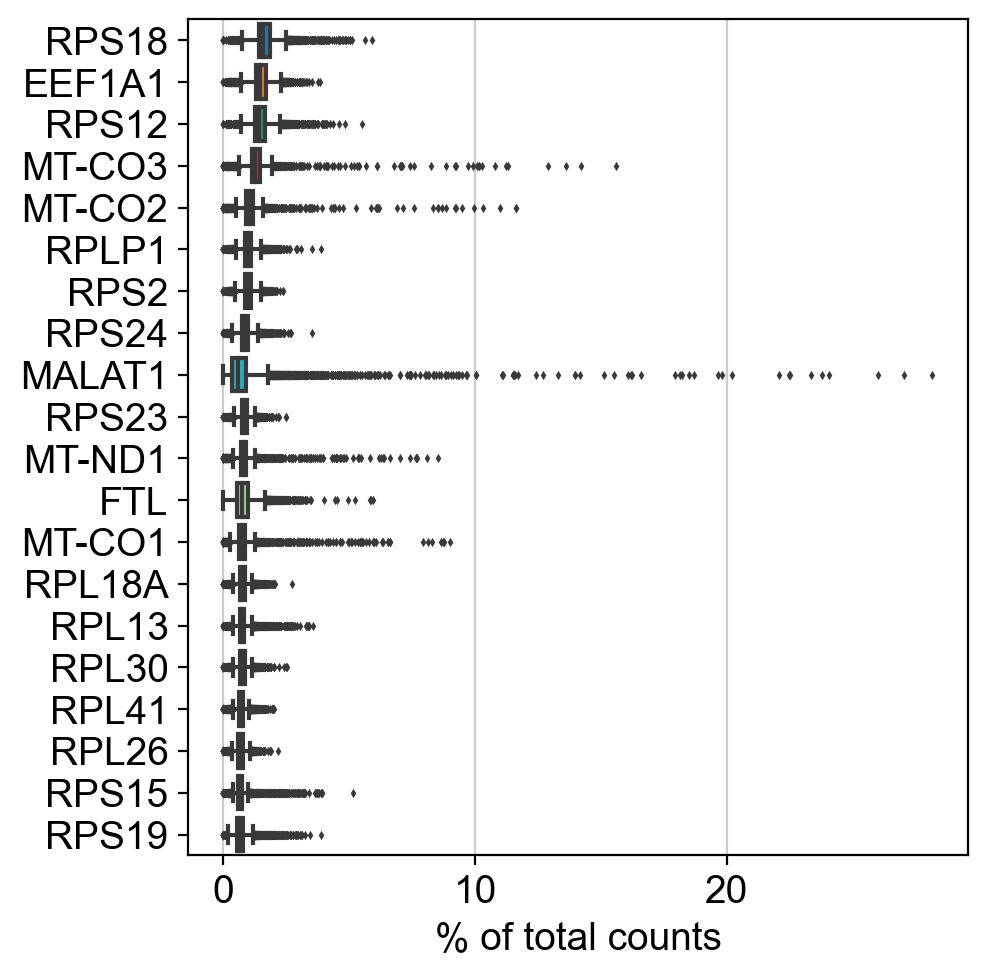

In [27]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [28]:
adata

AnnData object with n_obs × n_vars = 8446 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'guide2gene'

... storing 'guide' as categorical
... storing 'guide.compact' as categorical
... storing 'gene' as categorical
... storing 'gene.compact' as categorical


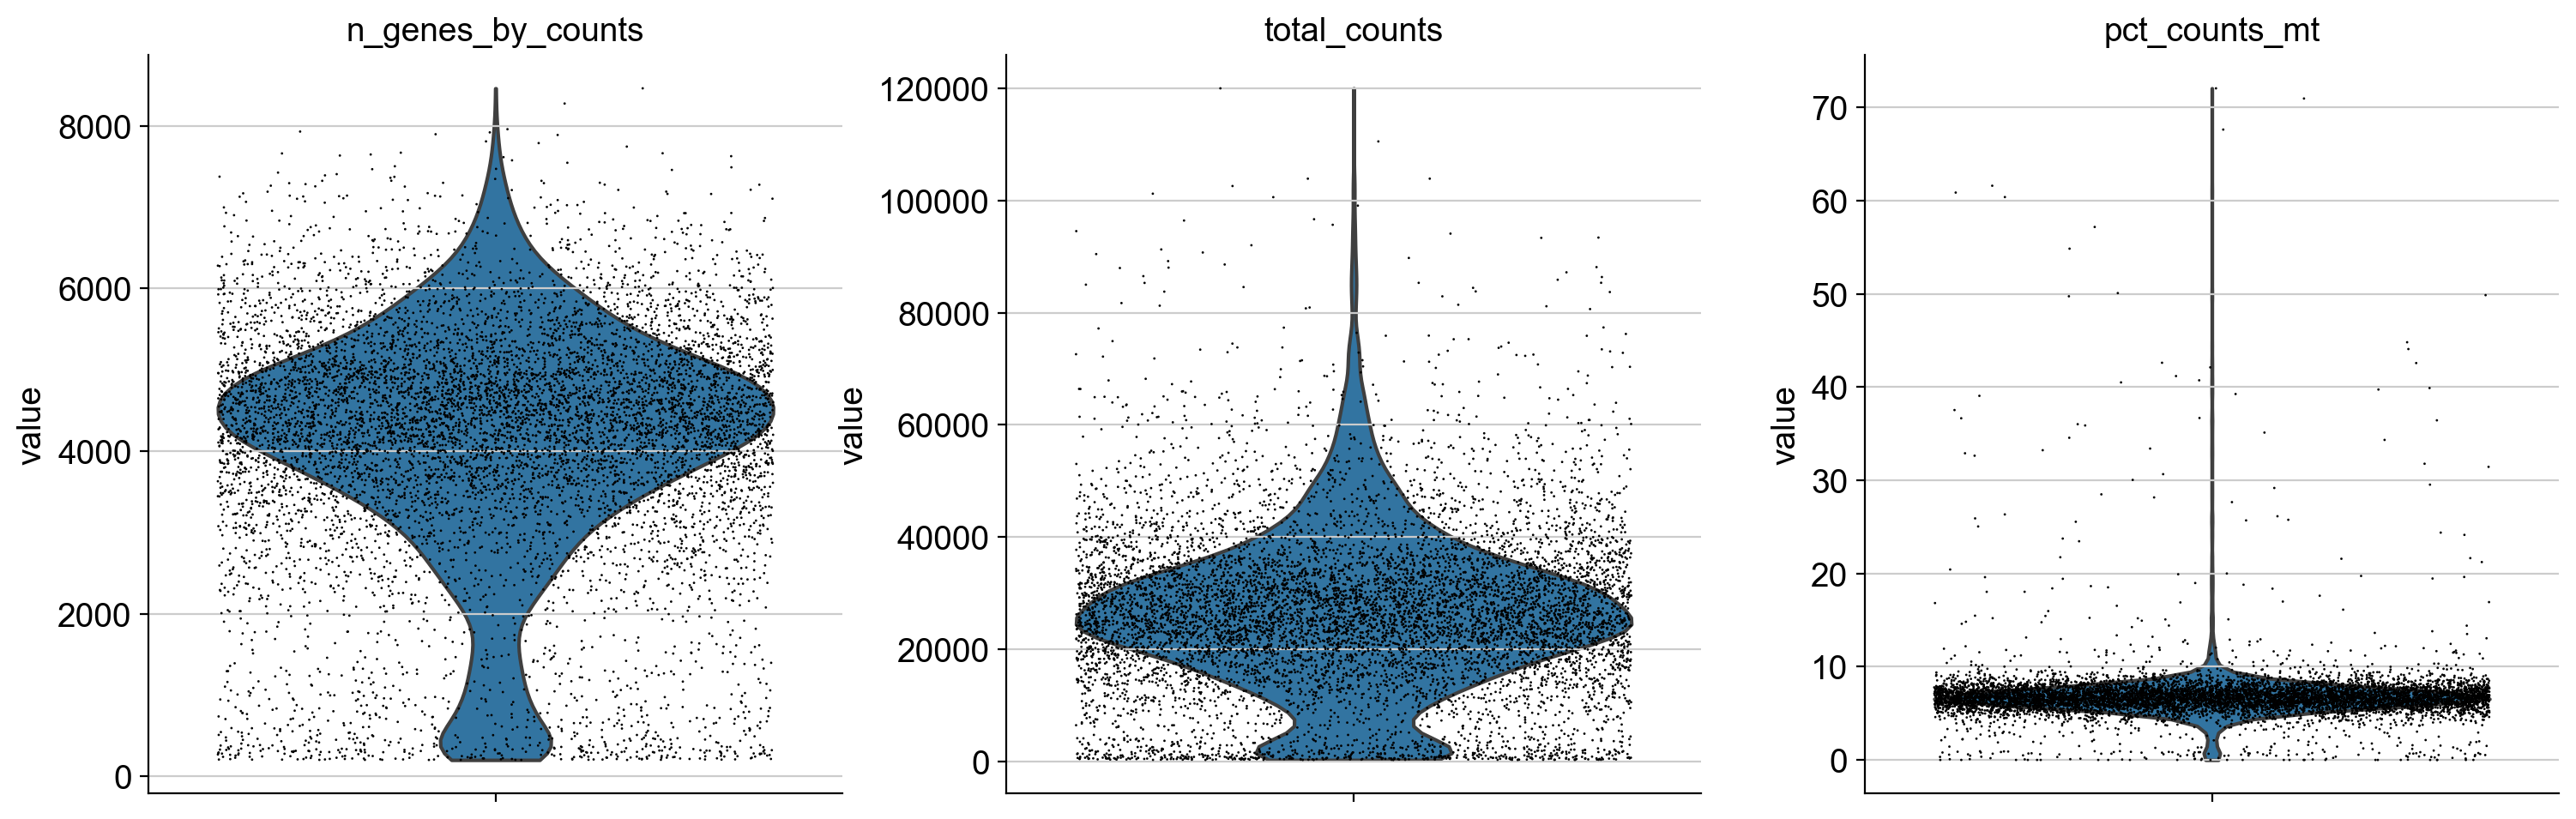

In [29]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

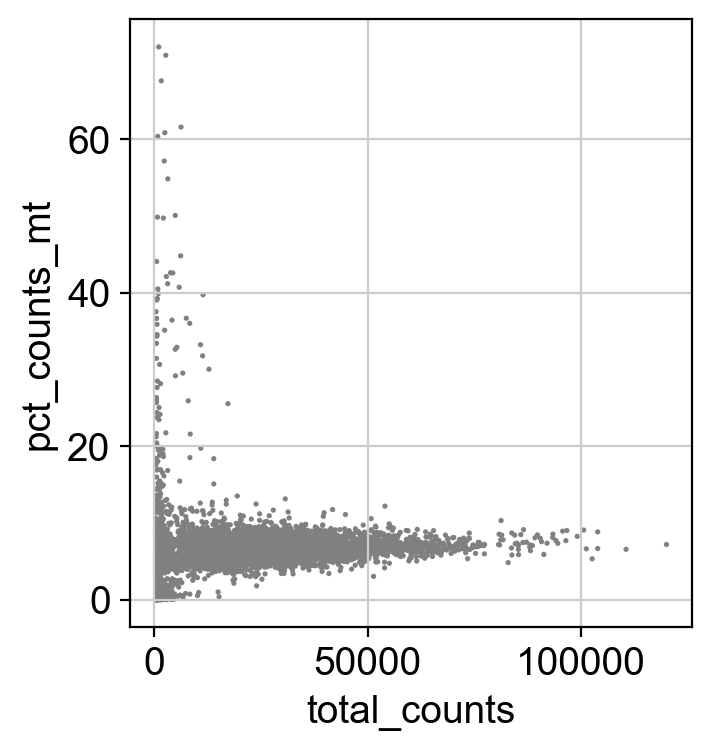

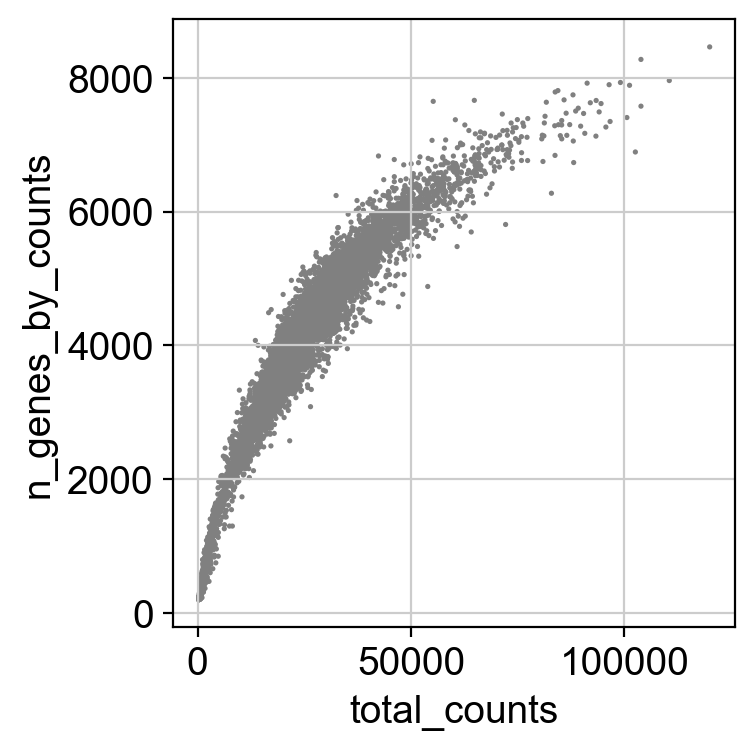

In [30]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

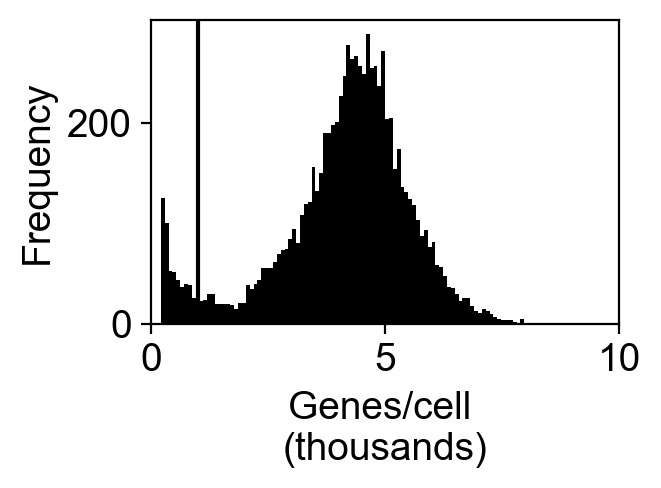

In [31]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_genes_by_counts']/1000,100,
         color='black')
plots.set_xticks([0,5,10])
plots.set_xlim(0,10)
plots.set_xlabel('Genes/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.axvline(x=1,color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/combo.GenesPerCell.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/combo.GenesPerCell.png',bbox_inches = "tight")

plt.show()

In [32]:
adata = adata[adata.obs.n_genes_by_counts > 1000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
adata

View of AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'guide2gene'

In [33]:
adata.write(pref+'.raw_counts.h5ad')

In [34]:
adata=sc.read(pref+'.raw_counts.h5ad')
adata

Only considering the two last: ['.raw_counts', '.h5ad'].
Only considering the two last: ['.raw_counts', '.h5ad'].


AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'guide2gene'

In [35]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [36]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


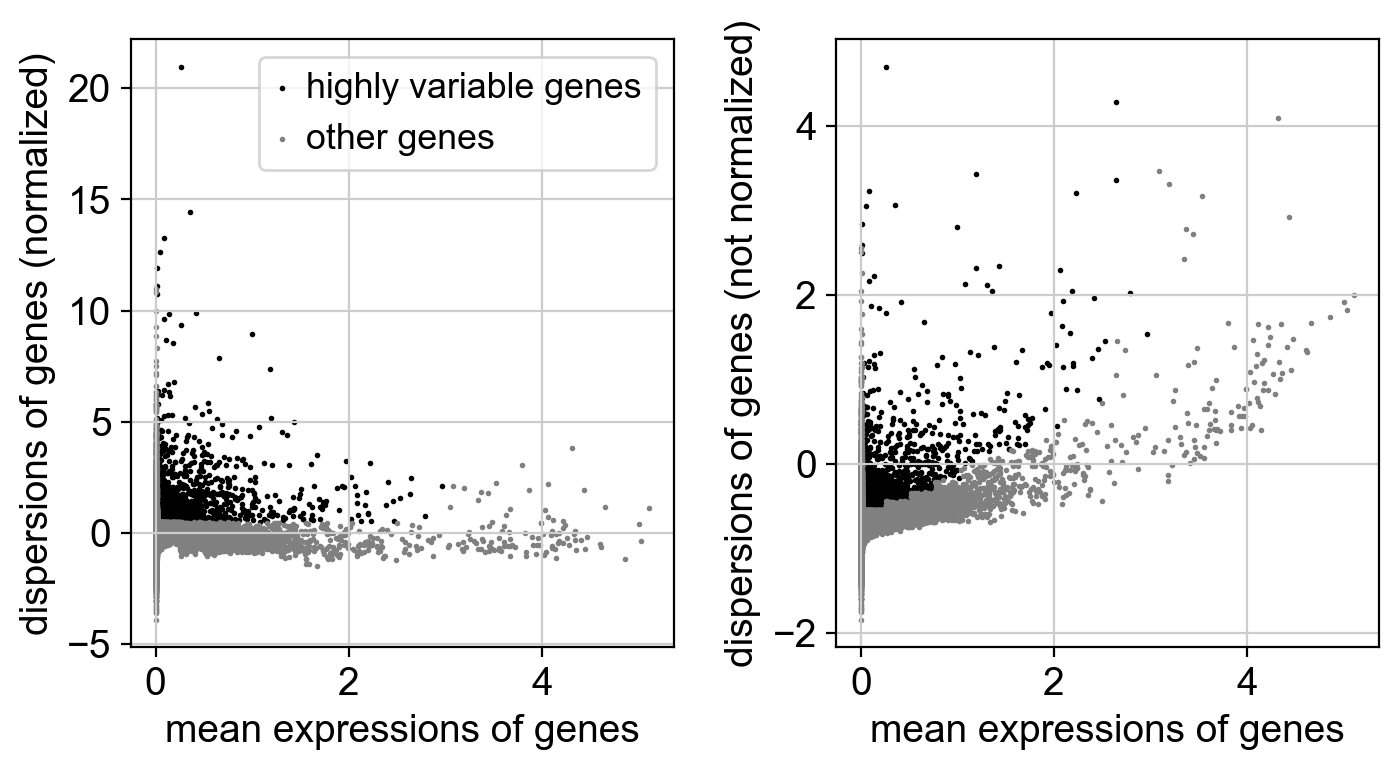

In [37]:
sc.pl.highly_variable_genes(adata)

In [38]:
adata.raw = adata

In [39]:
#regress out the batch effects
to_regress=['total_counts', 'pct_counts_mt']
for batch in set(adata.obs['batch']):
    to_regress.append(batch)
    adata.obs[batch]=1.0*(adata.obs['batch']==batch)
print(to_regress)

['total_counts', 'pct_counts_mt', '0', '2', '1']


In [40]:
sc.pp.regress_out(adata, to_regress)

regressing out ['total_counts', 'pct_counts_mt', '0', '2', '1']
    sparse input is densified and may lead to high memory use
... storing 'BCL7C_2' as categorical
... storing 'NTC6_IG1216445' as categorical
... storing 'SMARCA2_4' as categorical
... storing 'NTC7_IG1144056' as categorical
... storing 'NTC1_IG345439' as categorical
... storing 'GLTSCR1_1' as categorical
... storing 'SMARCD1_4' as categorical
... storing 'ARID1B_4' as categorical
... storing 'BCL7A_3' as categorical
... storing 'SMARCD2_3' as categorical
... storing 'BCL7B_1' as categorical
... storing 'SMARCA4_4' as categorical
... storing 'SS18_2' as categorical
... storing 'ARID1A_3' as categorical
... storing 'SMARCC2_3' as categorical
... storing 'BRD9_2' as categorical
... storing 'GLTSCR1L_3' as categorical
... storing 'PBRM1_3' as categorical
... storing 'SMARCE1_1' as categorical
... storing 'BRD7_2' as categorical
... storing 'PHF10_1' as categorical
... storing 'ARID2_1' as categorical
... storing 'SS18L_1' as

In [41]:
adata.write(pref+'.regressed.h5ad')

Stopping point
==

In [42]:
adata=sc.read(pref+'.regressed.h5ad')
adata

Only considering the two last: ['.regressed', '.h5ad'].
Only considering the two last: ['.regressed', '.h5ad'].


AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '2', '1'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'guide2gene', 'hvg'

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


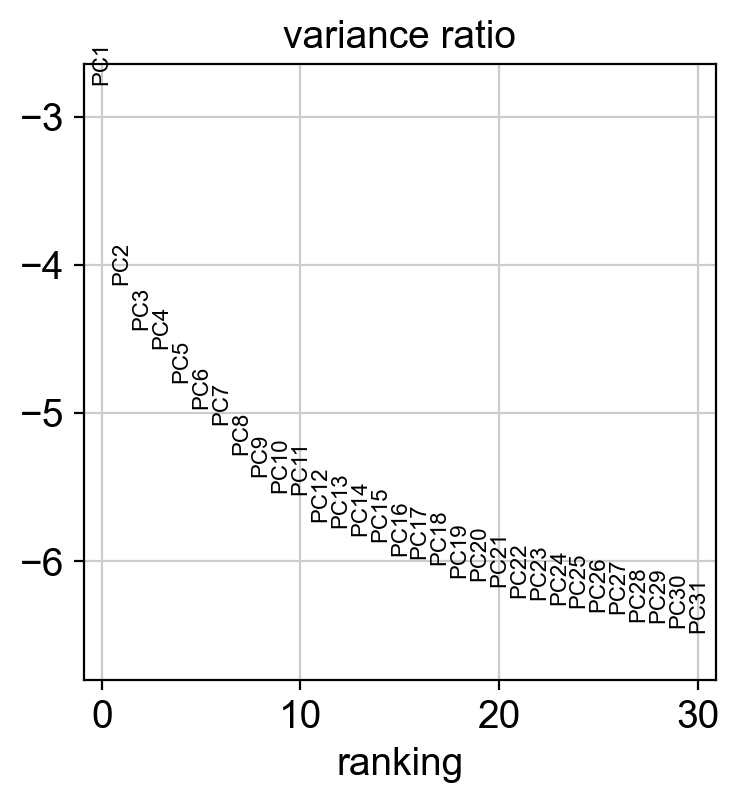

In [43]:
#zscores
sc.pp.scale(adata, max_value=10)

#PCs
sc.tl.pca(adata,svd_solver='arpack',n_comps=50)
sc.pl.pca_variance_ratio(adata, log=True)

In [44]:
sc.pp.neighbors(adata, n_neighbors=15)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [45]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


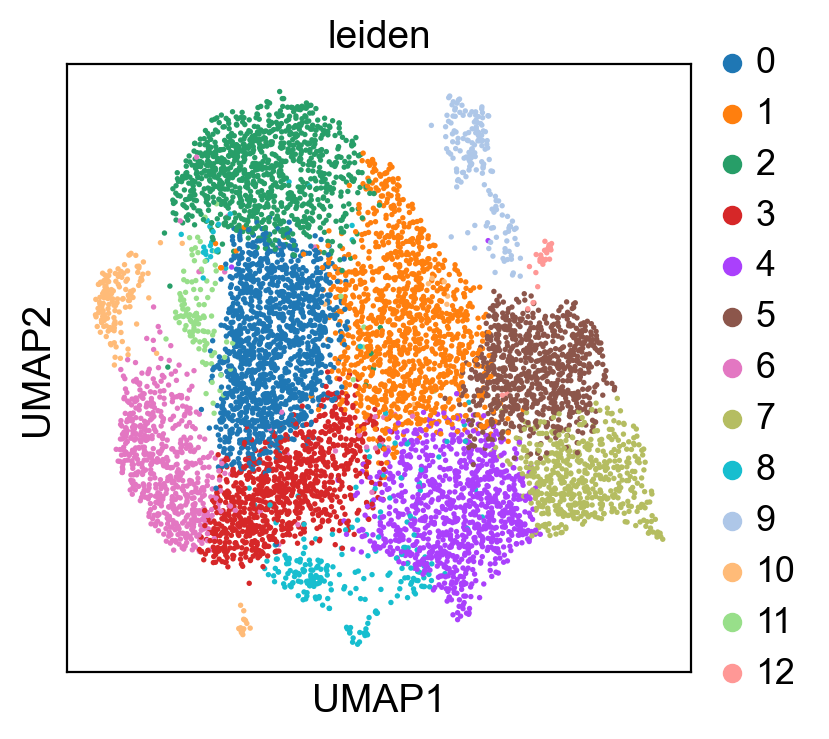

In [46]:
sc.pl.umap(adata,color=['leiden'])

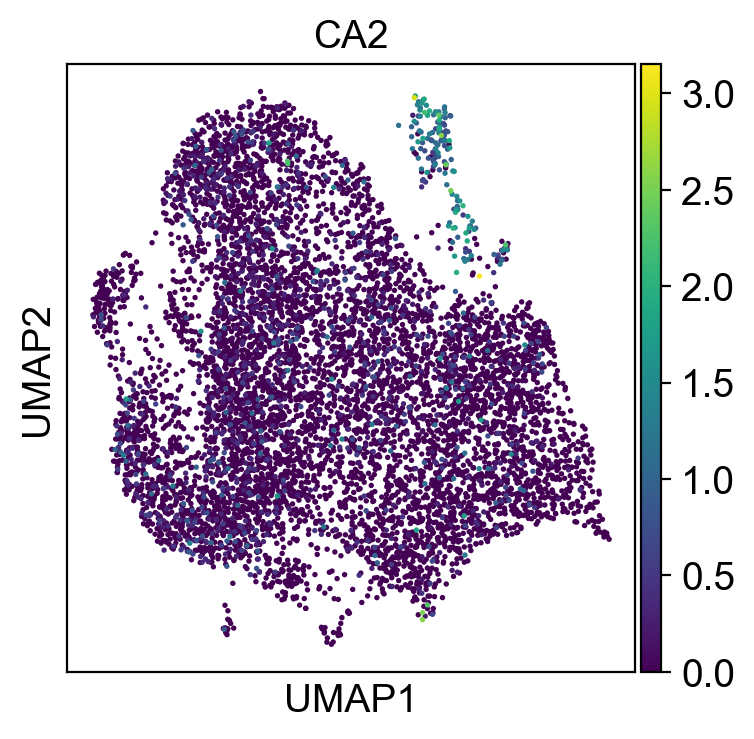

In [47]:
sc.pl.umap(adata,color='CA2')

In [ ]:
#clusters 9 and 12 are the 2nd cell state

In [48]:
adata.obs['cell_state']='state2'
adata.obs['cell_state'][~adata.obs['leiden'].isin(['9','12'])]='state1'

<ipython-input-48-8cba28801457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['cell_state'][~adata.obs['leiden'].isin(['9','12'])]='state1'


... storing 'cell_state' as categorical


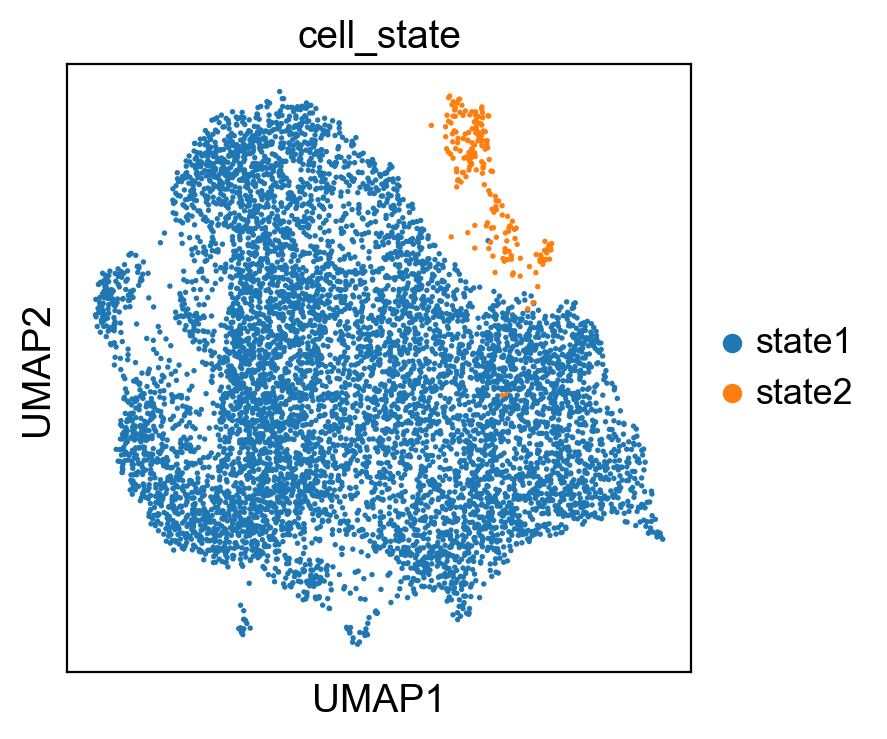

In [49]:
sc.pl.umap(adata,color='cell_state')

In [50]:
adata.obs['gene'].value_counts().sort_values(ascending=False)[:20]

unassigned          670
ARID1B              593
ARID2               411
control             404
SS18                394
DPF2                345
ARID1A,ARID1B       261
BRD9                241
GLTSCR1             235
GLTSCR1,GLTSCR1L    174
ARID1A              174
ARID2,BRD9          165
PBRM1               159
SMARCA2,SMARCA4     159
SMARCC1,SMARCC2     151
SMARCE1             140
GLTSCR1L            136
SMARCC2             135
SMARCA2             126
SMARCB1             112
Name: gene, dtype: int64

In [51]:
adata.write(pref+'.analysis.h5ad')

In [3]:
adata=sc.read(pref+'.analysis.h5ad')
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '2', '1', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [4]:
perturb.pp.cells_per_perturb(adata)

Found 26/26 perturbations


Found 26/26 perturbations
4136.0
11484.0


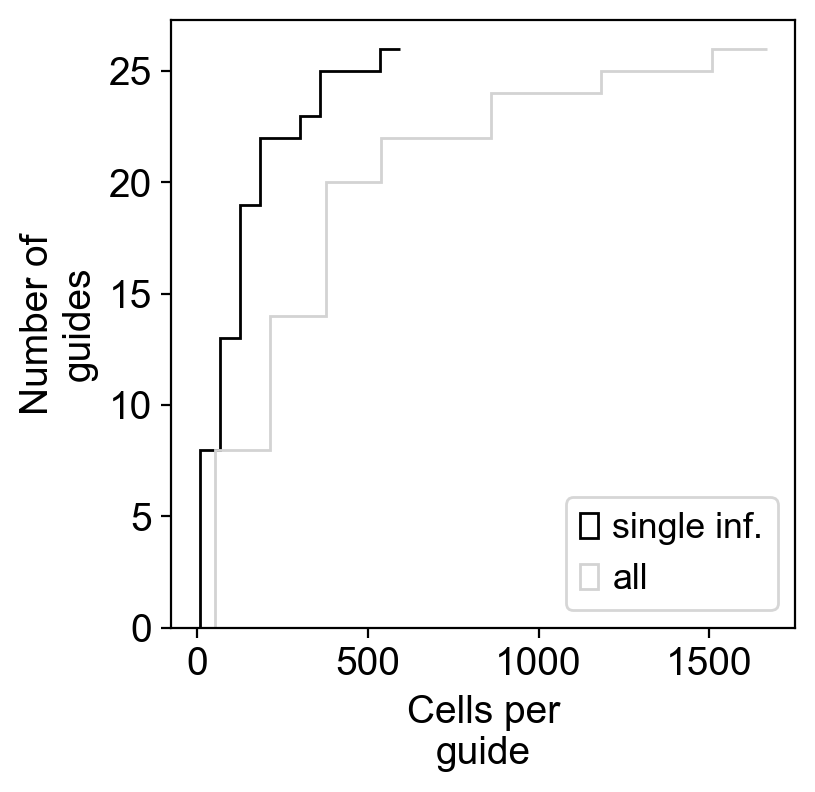

In [6]:
perturb.pl.cells_per_perturb(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'BCL7C_2', 'NTC6_IG1216445', 'SMARCA2_4', 'NTC7_IG1144056', 'NTC1_IG345439', 'GLTSCR1_1', 'SMARCD1_4', 'ARID1B_4', 'BCL7A_3', 'SMARCD2_3', 'BCL7B_1', 'SMARCA4_4', 'SS18_2', 'ARID1A_3', 'SMARCC2_3', 'BRD9_2', 'GLTSCR1L_3', 'PBRM1_3', 'SMARCE1_1', 'BRD7_2', 'PHF10_1', 'ARID2_1', 'SS18L_1', 'DPF2_4', 'SMARCC1_7', 'SMARCB1_5', 'ARID1B', 'SMARCC2', 'BCL7A', 'SS18', 'GLTSCR1', 'BCL7B', 'SMARCC1', 'SMARCE1', 'SMARCD1', 'GLTSCR1L', 'SMARCB1', 'control', 'cell', 'SMARCA2', 'SMARCA4', 'ARID2', 'PHF10', 'SMARCD2', 'SS18L', 'BRD7', 'BRD9', 'BCL7C', 'PBRM1', 'ARID1A', 'DPF2', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '2', '1', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [8]:
adata.uns['cells_per_condition.guide.incl_multi_inf']

,Number of cells
ARID1B_4,593
ARID2_1,411
SS18_2,394
DPF2_4,345
"ARID1A_3,ARID1B_4",261
...,...
"ARID1B_4,GLTSCR1L_3,GLTSCR1_1,NTC1_IG345439,NTC6_IG1216445",1
"ARID1B_4,DPF2_4,SS18_2",1
"ARID1B_4,DPF2_4,SMARCB1_5",1
"ARID1B_4,DPF2_4,SMARCA4_4",1


In [9]:
#make the heatmaps again
desired_combos={}
desired_combos['ARID1A_3,ARID1B_4']=0
desired_combos['SMARCA2_4,SMARCA4_4']=0
desired_combos['SMARCD1_4,SMARCD2_3']=0
desired_combos['BCL7A_3,BCL7B_1,BCL7C_2']=0
desired_combos['SMARCC1_7,SMARCC2_3']=0
desired_combos['GLTSCR1L_3,GLTSCR1_1']=0
desired_combos['SS18L_1,SS18_2']=0
desired_combos['DPF2_4,PHF10_1']=0
desired_combos['BCL7A_3,BCL7B_1']=0
desired_combos['BCL7B_1,BCL7C_2']=0
desired_combos['BCL7A_3,BCL7C_2']=0
desired_combos['BRD9_2,GLTSCR1L_3,GLTSCR1_1']=0
desired_combos['ARID1A_3,ARID1B_4,DPF2_4']=0
desired_combos['ARID2_1,BRD7_2,PBRM1_3']=0
desired_combos['ARID1A_3,ARID1B_4,ARID2_1']=0
desired_combos['ARID2_1,BRD9_2']=0
desired_combos['ARID1A_3,ARID1B_4,BRD9_2']=0
desired_combos['NTC1_IG345439,NTC6_IG1216445']=0
desired_combos['NTC1_IG345439,NTC6_IG1216445,NTC7_IG1144056']=0
desired_combos['ARID2_1,SMARCB1_5']=0
desired_combos['ARID1A_3,ARID1B_4,SMARCB1_5']=0
desired_combos['ARID2_1,SMARCE1_1']=0
desired_combos['ARID1A_3,ARID1B_4,SMARCE1_1']=0

In [10]:
cellcounts=adata.obs['guide'].value_counts().sort_values(ascending=False)

In [11]:
combo_list=desired_combos.keys()
combo_list_counts=pd.DataFrame(0,index=combo_list,columns=['number of cells'])
for combo in combo_list:
    if combo not in cellcounts.index:
        n=0
    else:
        n=cellcounts[combo]
    combo_list_counts.loc[combo,'number of cells']=n

In [12]:
combo_list_counts.sort_values(by='number of cells',ascending=False)

,number of cells
"ARID1A_3,ARID1B_4",261
"GLTSCR1L_3,GLTSCR1_1",174
"ARID2_1,BRD9_2",165
"SMARCA2_4,SMARCA4_4",159
"SMARCC1_7,SMARCC2_3",151
"ARID2_1,SMARCB1_5",108
"ARID2_1,SMARCE1_1",102
"NTC1_IG345439,NTC6_IG1216445",91
"SMARCD1_4,SMARCD2_3",88
"ARID1A_3,ARID1B_4,BRD9_2",66


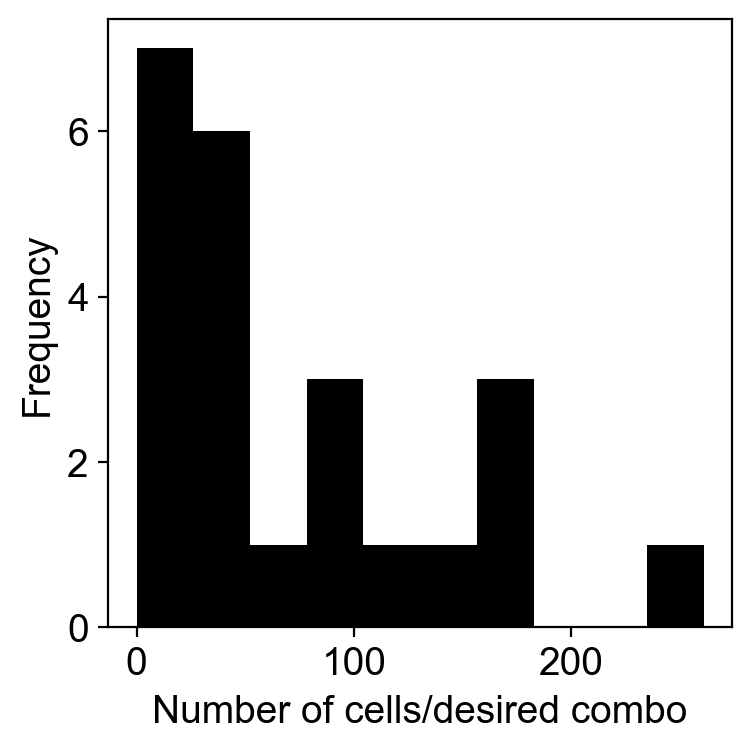

In [14]:
plt.hist(combo_list_counts['number of cells'],color='black')
plt.xlabel('Number of cells/desired combo')
plt.ylabel('Frequency')
plt.grid(False)

plt.savefig(FIGS+'combo.cells_per_perturb.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'combo.cells_per_perturb.png',transparent=True,bbox_inches='tight')


In [15]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/'